In [1]:
import pandas as pd

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Define column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_level',
           'marital_status', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
           'income']

# Read the dataset into a DataFrame
df = pd.read_csv(url, header=None, names=columns, skipinitialspace=True)

# Display the first few rows of the DataFrame
print(df.head())

   age         workclass  fnlwgt  education  education_level  \
0   39         State-gov   77516  Bachelors               13   
1   50  Self-emp-not-inc   83311  Bachelors               13   
2   38           Private  215646    HS-grad                9   
3   53           Private  234721       11th                7   
4   28           Private  338409  Bachelors               13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0 

In [2]:
# Convert 'sex' to binary (1 for male, 0 for female)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Convert 'race' to binary (1 for White, 0 for non-White)
most_common_race = df['race'].mode().iloc[0]
df['race'] = (df['race'] == most_common_race).astype(int)

# Convert 'native_country' to binary (1 for US, 0 for foreign)
most_common_country = df['native_country'].mode().iloc[0]
df['native_country'] = (df['native_country'] == most_common_country).astype(int)

# Convert 'income' to binary (1 for '>50K', 0 for '<=50K')
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Display the modified DataFrame
print(df.head())

   age         workclass  fnlwgt  education  education_level  \
0   39         State-gov   77516  Bachelors               13   
1   50  Self-emp-not-inc   83311  Bachelors               13   
2   38           Private  215646    HS-grad                9   
3   53           Private  234721       11th                7   
4   28           Private  338409  Bachelors               13   

       marital_status         occupation   relationship  race  sex  \
0       Never-married       Adm-clerical  Not-in-family     1    1   
1  Married-civ-spouse    Exec-managerial        Husband     1    1   
2            Divorced  Handlers-cleaners  Not-in-family     1    1   
3  Married-civ-spouse  Handlers-cleaners        Husband     0    1   
4  Married-civ-spouse     Prof-specialty           Wife     0    0   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40               1       0  
1             0             0              13     

In [3]:
# List of categorical columns
categorical_columns = ['workclass', 'marital_status', 'occupation']

# Convert each categorical column to fractions of '>50K' income
for column in categorical_columns:
    # Create a mapping of category to the fraction of '>50K' income
    category_fractions = df.groupby(column)['income'].mean()

    # Map the values to the corresponding fractions
    df[column] = df[column].map(category_fractions)

# Display the modified DataFrame
print(df.head())

   age  workclass  fnlwgt  education  education_level  marital_status  \
0   39   0.271957   77516  Bachelors               13        0.045961   
1   50   0.284927   83311  Bachelors               13        0.446848   
2   38   0.218673  215646    HS-grad                9        0.104209   
3   53   0.218673  234721       11th                7        0.446848   
4   28   0.218673  338409  Bachelors               13        0.446848   

   occupation   relationship  race  sex  capital_gain  capital_loss  \
0    0.134483  Not-in-family     1    1          2174             0   
1    0.484014        Husband     1    1             0             0   
2    0.062774  Not-in-family     1    1             0             0   
3    0.062774        Husband     0    1             0             0   
4    0.449034           Wife     0    0             0             0   

   hours_per_week  native_country  income  
0              40               1       0  
1              13               1       0  
2 

In [4]:
# Drop specified columns
columns_to_drop = ['education', 'relationship', 'fnlwgt']
df = df.drop(columns=columns_to_drop)

# Display the modified DataFrame
print(df.head())

   age  workclass  education_level  marital_status  occupation  race  sex  \
0   39   0.271957               13        0.045961    0.134483     1    1   
1   50   0.284927               13        0.446848    0.484014     1    1   
2   38   0.218673                9        0.104209    0.062774     1    1   
3   53   0.218673                7        0.446848    0.062774     0    1   
4   28   0.218673               13        0.446848    0.449034     0    0   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40               1       0  
1             0             0              13               1       0  
2             0             0              40               1       0  
3             0             0              40               1       0  
4             0             0              40               0       0  


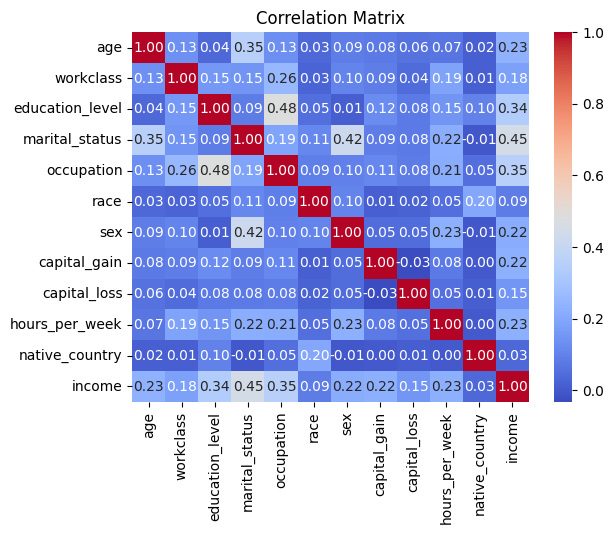

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Drop additional specified columns
additional_columns_to_drop = ['workclass', 'race', 'capital_loss', 'native_country']
df = df.drop(columns=additional_columns_to_drop)

# Display the modified DataFrame
print(df.head())

   age  education_level  marital_status  occupation  sex  capital_gain  \
0   39               13        0.045961    0.134483    1          2174   
1   50               13        0.446848    0.484014    1             0   
2   38                9        0.104209    0.062774    1             0   
3   53                7        0.446848    0.062774    1             0   
4   28               13        0.446848    0.449034    0             0   

   hours_per_week  income  
0              40       0  
1              13       0  
2              40       0  
3              40       0  
4              40       0  


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Extract features (X) and target variable (y)
X = df.drop(columns=['income'])
y = df['income']

# Encode categorical variables if needed (e.g., using one-hot encoding)
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8366344234607708
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      4942
           1       0.80      0.43      0.56      1571

    accuracy                           0.84      6513
   macro avg       0.82      0.70      0.73      6513
weighted avg       0.83      0.84      0.82      6513



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
